### ToDay Topic
 - Edge Detection
 - Conture Detection
 - 

## Multiple Threshold
 - Beacuse in image there are many region and every region pixel values are hold the Diffrent Propeties 
    - so we need the some multithreshvalues 

In [1]:
# All Library Load w
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

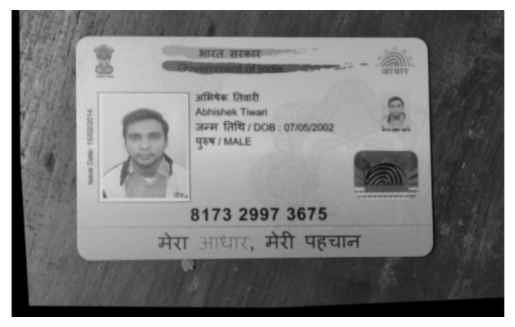

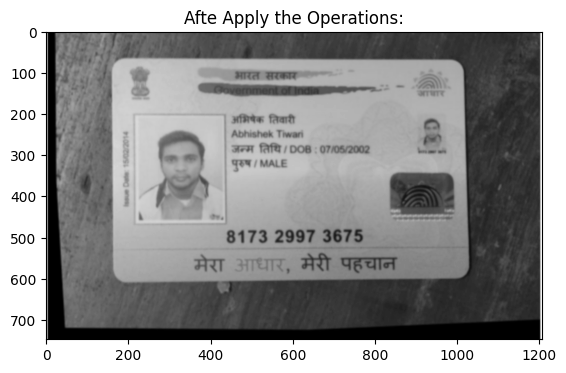

In [3]:
path = "images/Pan_Card.png"
img = cv2.imread(path)
# Convet the image into the gray scale
gray = cv2.cvtColor(img , cv2.COLOR_BGR2GRAY)
plt.imshow(gray , cmap='gray')
plt.axis("off")
plt.show()
blur_img = cv2.GaussianBlur(gray , (3 , 3) , 0)
plt.figure()
plt.imshow(blur_img , cmap='gray')
plt.title("Afte Apply the Operations:")
plt.show()

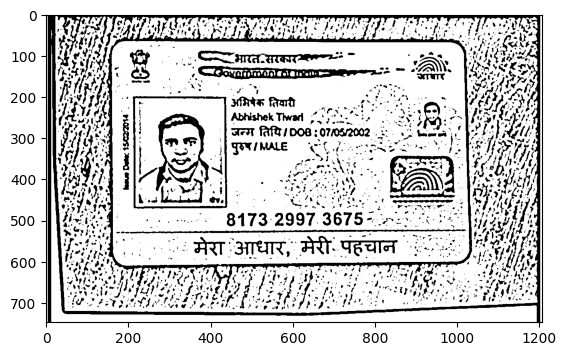

In [5]:
adp_tresh = cv2.adaptiveThreshold(blur_img , 255 , cv2.ADAPTIVE_THRESH_GAUSSIAN_C , cv2.THRESH_BINARY , 21 , 2)
plt.imshow(adp_tresh , cmap="Greys_r")


110.0


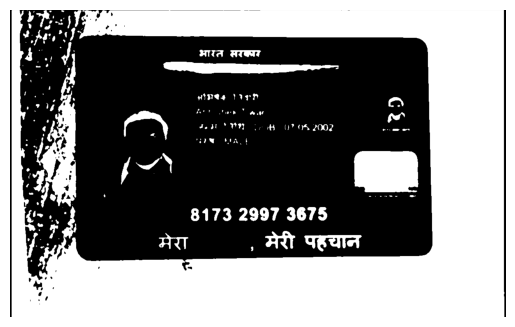

In [11]:
# Now We are remove the background of the images with the help of hte This
T , thresh = cv2.threshold(blur_img , 150 , 255 , cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(T)
plt.imshow(thresh , cmap='gray')
plt.axis("Off")
plt.show()

#### Edge Detection Module
 - With the help of this Fun.. we can detect the edge of the images like surrounding images.
 - Edge means when pixel value highly change low or high that time we threate this point a as edge (like 255 to 15 so that time this one is edge )
- Type Of Edge 
    - Step Edge
    - ramp Edge
    - roof edge
    


Text(0.5, 1.0, 'Original Image Look Like That')

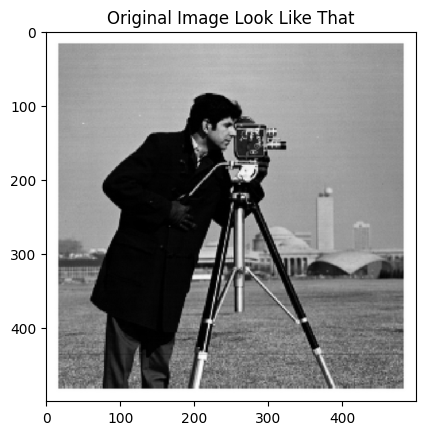

In [7]:
path = "images/Man_Ground.png"
img = cv2.imread(path)
plt.imshow(img)
plt.title("Original Image Look Like That")


### Edge Detection Using the Gradient
 - 

In [12]:
sobelx = cv2.Sobel(src=thresh, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) #
sobely = cv2.Sobel(src=thresh, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) #
sobelxy = cv2.Sobel(src=thresh, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
# Display Sobel Edge Detection Images
cv2.imshow('Sobel X', sobelx)
cv2.waitKey(0)

cv2.imshow('Sobel Y', sobely)
cv2.waitKey(0)
cv2.imshow('Sobel X Y using Sobel() function', sobelxy)
cv2.waitKey(0)
cv2.destroyAllWindows()
# plt.imshow(sobelx, cmap = 'gray')
#

### Cany Edge Detection
 - Noise Reduction
 - Integrity of the IMG
 - Calculating the Intensity Gradient of the Image
- Suppression of False Edges
- Hysteresis Thresholding

In [18]:
#Best Way to Detect the edges

edges = cv2.Canny(blur_img  , threshold1 = 100 , threshold2=200)
cv2.imshow("Show " , edges)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [26]:
img  = cv2.imread("images/Pan_Card.png")
rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

contours (0, 0, 1207, 748)
Area 821714.5


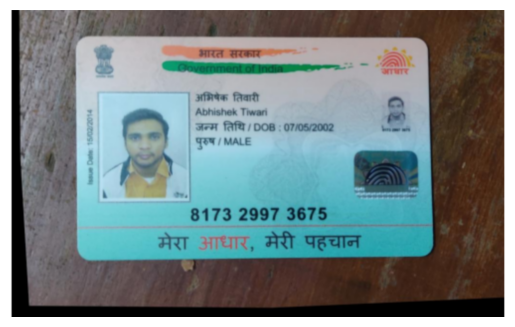

In [27]:
contours, _ = cv2.findContours(adp_tresh, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_SIMPLE)
# Select the largest contour (assuming the ID card is the largest object)
largest_contour = None
largest_area = 0
for cnt in contours:
    area = cv2.contourArea(cnt)
    if area > largest_area:
        largest_contour = cnt
        largest_area = area
x, y, w, h = cv2.boundingRect(largest_contour)
print("contours", (x, y, w, h))
print("Area", largest_area)
contour_id = rgb_img[y:y+h, x:x+w]
plt.imshow(contour_id)
plt.axis('off')
plt.show()